In this notebook we plot 2D projections of the L96-EBM attractors for different values of S

In [1]:
from plotting_IO import *
from scipy.interpolate import interp1d

In [13]:
len(m_S_values)

8

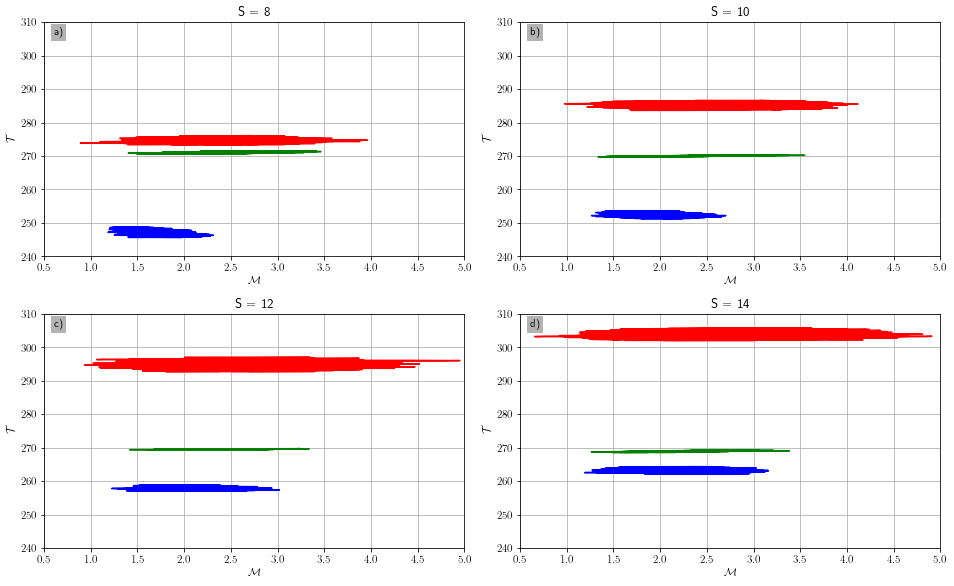

In [29]:
fig, axes = init_2d_fax(ncols=2, nrows=2, fraction=2)

sb_S_values = np.arange(7, 16)
w_S_values = np.arange(8, 17)
m_S_values = np.arange(8, 16)

for i, S in enumerate([8, 10, 12, 14]):
    ax = axes.flatten()[i]
    
    # Fetch Data
    sb_attractor = get_sb_attractor(S=S)
    w_attractor = get_w_attractor(S=S)
    m_state = get_m_state(S=S)
    
    for x in [sb_attractor, w_attractor, m_state]:
        x.MT_plot(fax=[fig, ax])
        
    ax.set_title(f'S = {S}')
    ax.grid()
    ax.set_ylim(240, 310)
    ax.set_xlim(0.5, 5)
fig.tight_layout()

In [ ]:
fig, ax = init_2d_fax()
fax = [fig, ax]

attractor_list = get_all_sb_attractors()
S_values = [x.S for x in attractor_list]
observable_values = [x.T_mean for x in attractor_list]
interpolated_observable_function = interp1d(S_values, observable_values)

S_grid = np.linspace(min(S_values), max(S_values))
ax.plot(S_grid, interpolated_observable_function(S_grid))
ax.scatter(S_values, observable_values)

attractor_list = get_all_w_attractors()
S_values = [x.S for x in attractor_list]
observable_values = [x.T_mean for x in attractor_list]
interpolated_observable_function = interp1d(S_values, observable_values)

S_grid = np.linspace(min(S_values), max(S_values))
ax.plot(S_grid, interpolated_observable_function(S_grid))
ax.scatter(S_values, observable_values)

In [ ]:
space_grid = np.arange(min(m_state.ds.space), max(m_state.ds.space) + 0.1, 0.1)
m_state = get_m_state(interpolate_time=True, interpolate_space=False)
x = m_state.ds.interp({'space': space_grid}, method='cubic', kwargs={'bounds_error': False, 'fill_value':'extrapolate'})
x.X[0].plot()

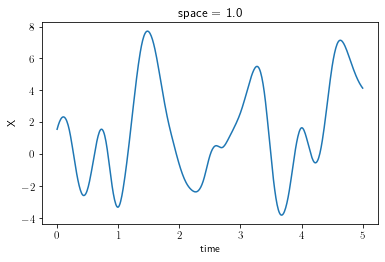

In [2]:
m_state = get_m_state(interpolate_time=True, interpolate_space=True)
m_state.ds.X.T[0].sel(time=slice(0, 5)).plot()

8.860755080486053

In [ ]:
space_grid = np.arange(min(self.ds.space), max(self.ds.space) + 0.1, 0.1)

In [ ]:
m_state.ds.X.isel(space=0)

In [ ]:
dt = (m_state_ds.time[1] - m_state_ds.time[0]).item()
m_state_ds.assign_coords({'time': dt * np.arange(len(m_state_ds.time))})

In [ ]:
time_grid = np.arange(0, max(m_state.ds.time) + 0.1 - min(m_state.ds.time), 0.1)

In [ ]:
m_state.ds = m_state.ds.interp({'time':time_grid})
space_grid = np.arange(min(m_state.ds.space), max(m_state.ds.space) + 0.1, 0.1)
m_state.ds = m_state.ds.interp({'space':space_grid})
m_state.ds

In [ ]:
np.arange(min(m_state.space), max(m_state.space) + 0.1, 0.1)


In [ ]:
get_all_sb_attractors()[0].M_timeseries_plot()

# Specifying S Values

In [ ]:
# S Values we're interested in
sb_S_values = [0.1, 1, 6, 7, 7.73, 7.8, 7.9] + list(range(8, 16)) + [15.1, 15.2, 15.28]
sb_W_values = [7.73, 7.8, 7.9] + list(range(8, 16)) + [15.1, 15.2, 15.28, 16, 17, 50, 100]

# MT Projection

In [ ]:
fax = init_2d_fax(nrows=3, ncols=6, fraction=5)
for i, S in enumerate(sb_S_values):
    fig, ax = [fax[0], fax[1].flatten()[i]]
    sb_attractor = get_sb_attractor(S=S)
    sb_attractor.MT_plot(fax=[fig, ax])
    ax.set_title(f'S = {S:.3f}')
#     ax.set_ylim(240, 270)
    ax.set_xlim(0, 5)
    ax.grid()

In [ ]:
fax = init_2d_fax(nrows=3, ncols=6, fraction=5)
for i, S in enumerate(sb_S_values):
    fig, ax = [fax[0], fax[1].flatten()[i]]
    sb_attractor = get_sb_attractor(S=S)
    sb_attractor.T_timeseries_plot(fax=[fig, ax])
    ax.set_title(f'S = {S:.3f}')
    ax.grid()

In [ ]:
fax = init_2d_fax(nrows=3, ncols=6, fraction=5)
for i, S in enumerate(sb_W_values):
    fig, ax = [fax[0], fax[1].flatten()[i]]
    w_attractor = get_w_attractor(S=S)
    w_attractor.MT_plot(fax=[fig, ax])
    ax.set_title(f'S = {S:.3f}')
    ax.set_xlim(-1, 10)
    ax.grid()

In [ ]:
fax = init_2d_fax(nrows=3, ncols=6, fraction=5)
for i, S in enumerate(sb_W_values):
    fig, ax = [fax[0], fax[1].flatten()[i]]
    w_attractor = get_w_attractor(S=S)
    w_attractor.T_timeseries_plot(fax=[fig, ax])
    ax.set_title(f'S = {S:.3f}')
    ax.grid()

In [ ]:
old_data_pd = '/Users/cfn18/Documents/PhD-Work/Third-Year/Instanton-Work/L96-EBM-Instanton/Deterministic-Model/Effect-of-S/Attractor-Data/'

def old_m_state_file_name(S):
    return old_data_pd + f'S_{int(S)}/M-State/1.nc'

def new_m_state_file_name(S):
    return old_data_pd + f'S_{int(S)}/M-State/1.nc'

In [ ]:
import os

In [ ]:
for S in range(8, 16):
    old_file = old_m_state_file_name(S)
    new_file = m_state_file_name(S=S)
    print(f'Old file:\n\n{old_file}\n\nNew file:\n\n{new_file}\n\n')
    os.renames(old_file, new_file)
#     print() * )) )
#     print()